In [40]:
# Hotel Booking Analysis
# Import Libraries
# pandas used for data manipulation, matplotlib used for visualition, seaborn is also visualization library but it also gives advanced visulaziation tools
#(we can also use plotly if we want 3-d plotting).

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

In [39]:
file_path = "Hotel_bookings_final.xlsx"   # Upload this file to Colab
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()

In [38]:
# Knowing the datset(all the basic info like structure and size of data)
df = df.drop_duplicates()
df = df.dropna(how="all")

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

Dataset Loaded Successfully!
Shape: (30000, 26)
Columns: ['customer_id', 'property_id', 'city', 'star_rating', 'booking_date', 'check_in_date', 'check_out_date', 'room_type', 'num_rooms_booked', 'stay_type', 'booking_channel', 'booking_value', 'costprice', 'markup', 'selling_price', 'payment_method', 'refund_status', 'refund_amount', 'channel_of_booking', 'booking_status', 'travel_date', 'cashback', 'coupon_redeem', 'Coupon USed?', 'check_in_month', 'lead_time']
   customer_id  property_id           city  star_rating booking_date  \
0          492            3  San Francisco            4   2024-04-01   
1          180            3         Dallas            3   2024-04-01   
2           50            5         Dallas            3   2024-04-01   
3          294            3        Orlando            4   2024-04-01   
4           40            5        Seattle            5   2024-04-01   

  check_in_date check_out_date room_type  num_rooms_booked stay_type  ...  \
0    2024-05-24     202

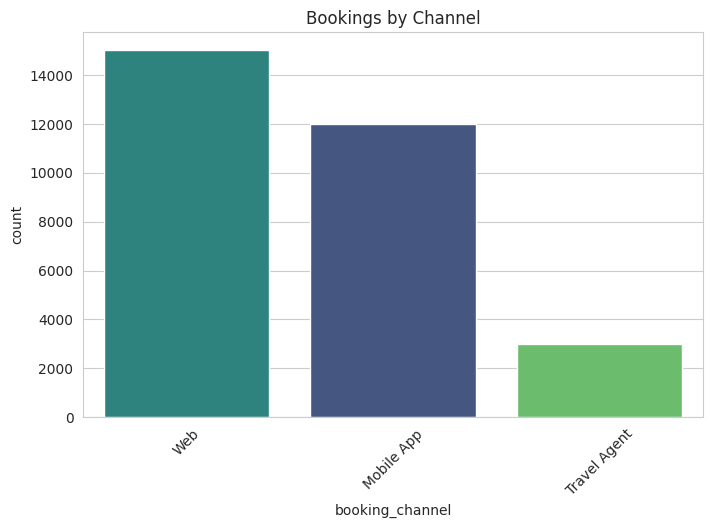

In [37]:
# Booking Channels Distribution -Compared different channels using Count Plot
plt.figure(figsize=(8,5))
sns.countplot(x="booking_channel", data=df, order=df['booking_channel'].value_counts().index,
              hue="booking_channel", legend=False, palette="viridis")
plt.title("Bookings by Channel")
plt.xticks(rotation=45)
plt.show()

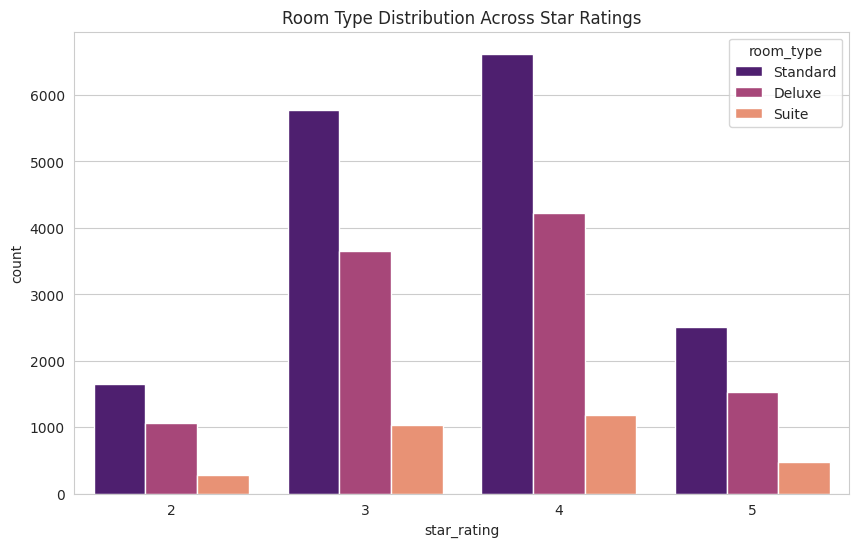

In [36]:
# Room Type vs Star Rating- in this we compared three types of room by their rating
plt.figure(figsize=(10,6))
sns.countplot(x="star_rating", hue="room_type", data=df, palette="magma")
plt.title("Room Type Distribution Across Star Ratings")
plt.show()

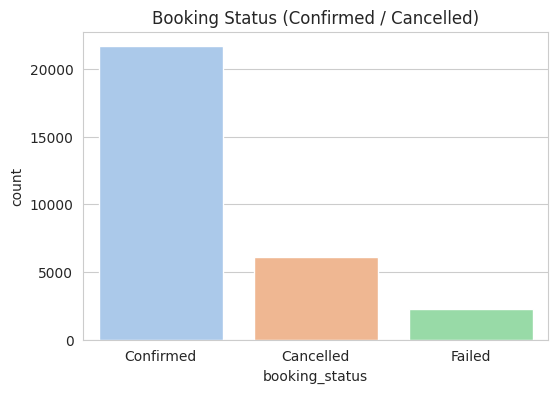

In [35]:
#Booking status-Successfull, Cancelled and failed
plt.figure(figsize=(6,4))
sns.countplot(x="booking_status", data=df, hue="booking_status", legend=False, palette="pastel")
plt.title("Booking Status (Confirmed / Cancelled)")
plt.show()

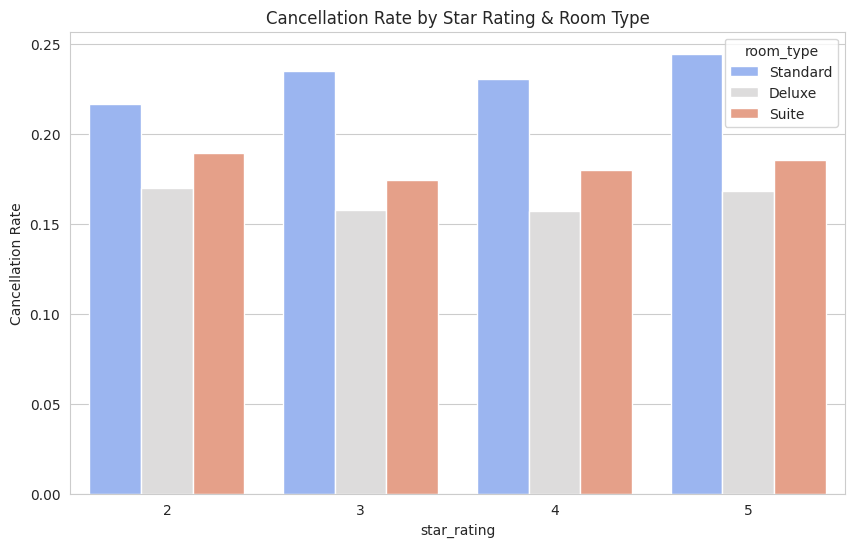

In [34]:
# Cancellation rate by star_rating and room_type - In above comparison we compared roomtype based on star rating but here we analysing cancellation rased based on them.
cancel_df = df.copy()
cancel_df['is_cancelled'] = cancel_df['booking_status'].apply(lambda x: 1 if str(x).lower()=="cancelled" else 0)

plt.figure(figsize=(10,6))
sns.barplot(x="star_rating", y="is_cancelled", hue="room_type", data=cancel_df,
            estimator=lambda x: sum(x)/len(x), errorbar=None, palette="coolwarm")
plt.title("Cancellation Rate by Star Rating & Room Type")
plt.ylabel("Cancellation Rate")
plt.show()

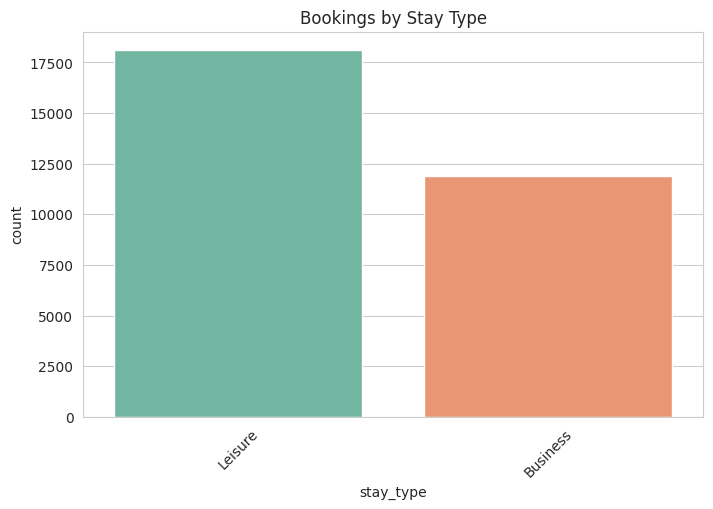

In [33]:
# Stay Type Analysis
plt.figure(figsize=(8,5))
sns.countplot(x="stay_type", data=df, order=df['stay_type'].value_counts().index,
              hue="stay_type", legend=False, palette="Set2")
plt.title("Bookings by Stay Type")
plt.xticks(rotation=45)
plt.show()

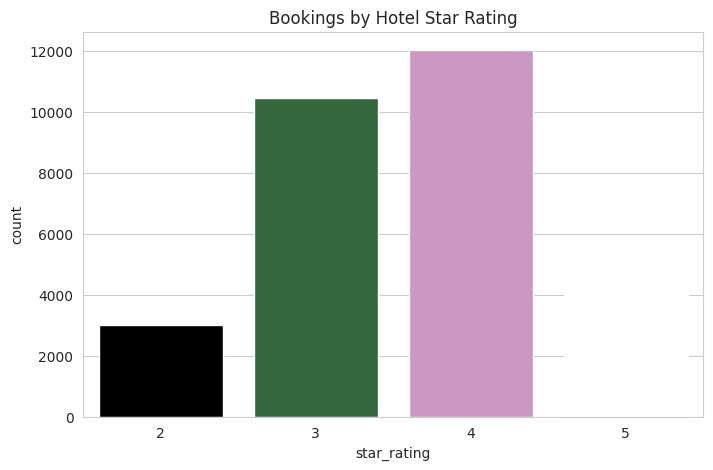

In [32]:
# Star Rating Distribution- This shows booking based on star rating
plt.figure(figsize=(8,5))
sns.countplot(x="star_rating", data=df, hue="star_rating", legend=False, palette="cubehelix")
plt.title("Bookings by Hotel Star Rating")
plt.show()

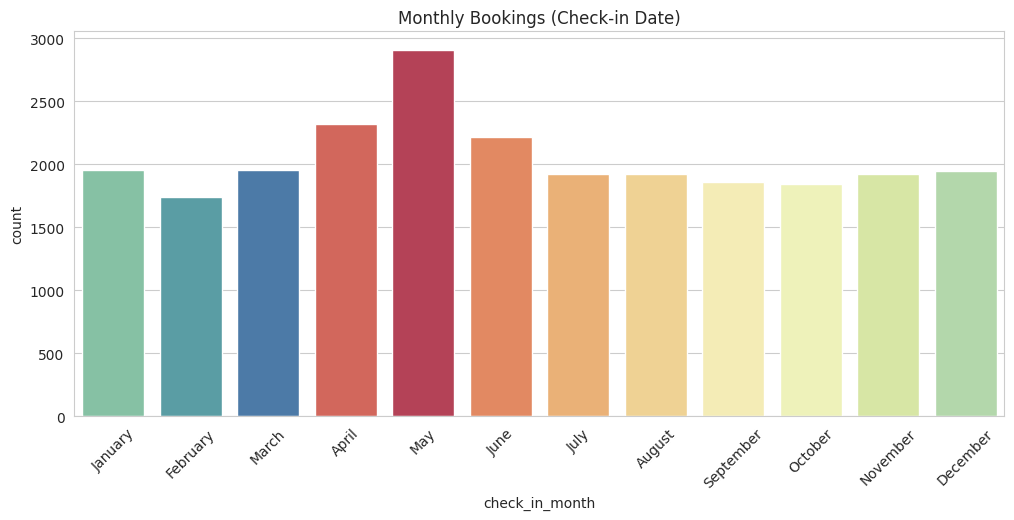

In [31]:
# Monthly / Seasonal Trends - Important info to find which time period is peak time for hotel bookings
df['check_in_date'] = pd.to_datetime(df['check_in_date'])
df['check_in_month'] = df['check_in_date'].dt.month_name()
month_order = [calendar.month_name[i] for i in range(1,13)]
plt.figure(figsize=(12,5))
sns.countplot(x="check_in_month", data=df, order=month_order, hue="check_in_month", legend=False, palette="Spectral")
plt.title("Monthly Bookings (Check-in Date)")
plt.xticks(rotation=45)
plt.show()


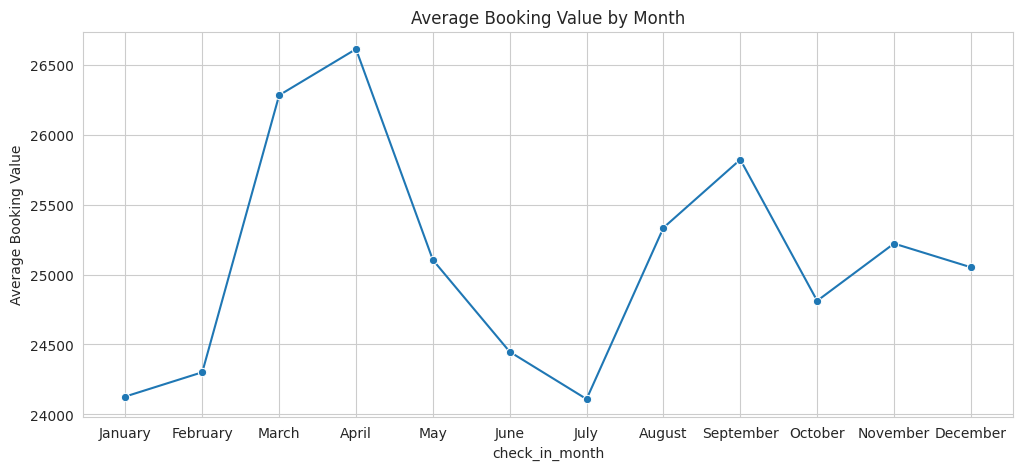

In [30]:
#Average Booking Value Trend- It is one step ahead of monthly booking analysis because it is showing booking value. So there are some months which does not have high booking numbers by they have significantly higher booking value
plt.figure(figsize=(12,5))
sns.lineplot(data=df.groupby("check_in_month")["booking_value"].mean().reindex(month_order), marker="o")
plt.title("Average Booking Value by Month")
plt.ylabel("Average Booking Value")
plt.show()

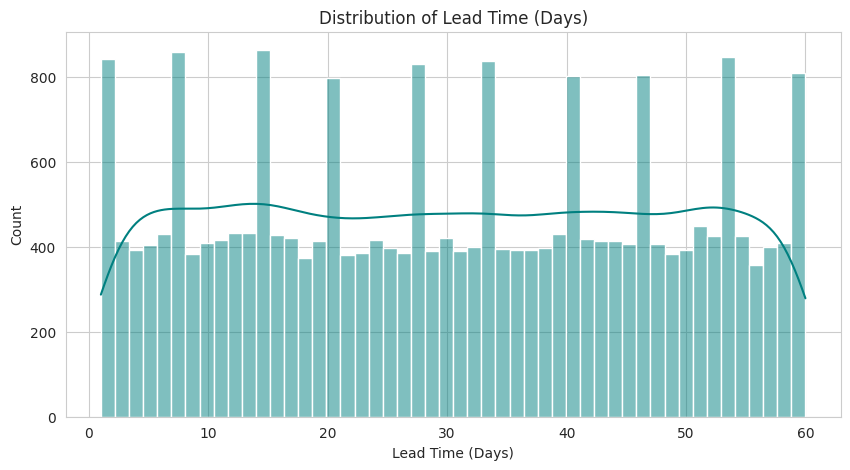

In [29]:
df['booking_date'] = pd.to_datetime(df['booking_date'])
df['lead_time'] = (df['check_in_date'] - df['booking_date']).dt.days

plt.figure(figsize=(10,5))
sns.histplot(df['lead_time'], bins=50, kde=True, color="teal")
plt.title("Distribution of Lead Time (Days)")
plt.xlabel("Lead Time (Days)")
plt.show()

/tmp/ipython-input-977351555.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="booking_status", y="lead_time", data=df, palette="Set3")


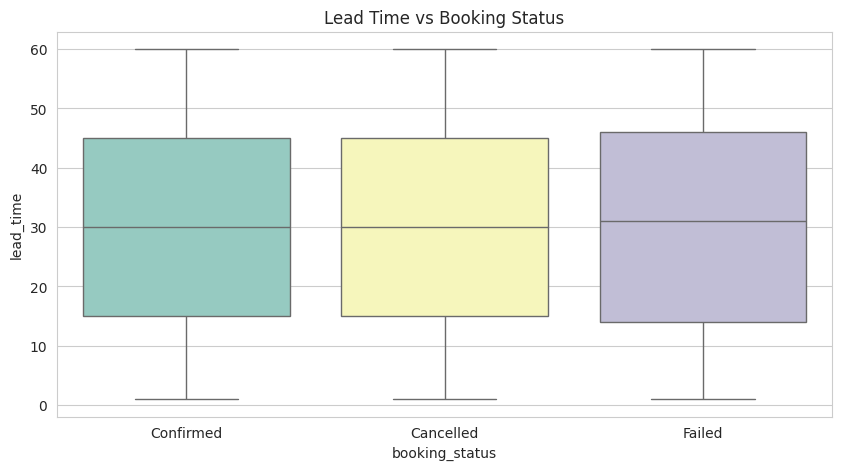

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x="booking_status", y="lead_time", data=df, palette="Set3")
plt.title("Lead Time vs Booking Status")
plt.show()

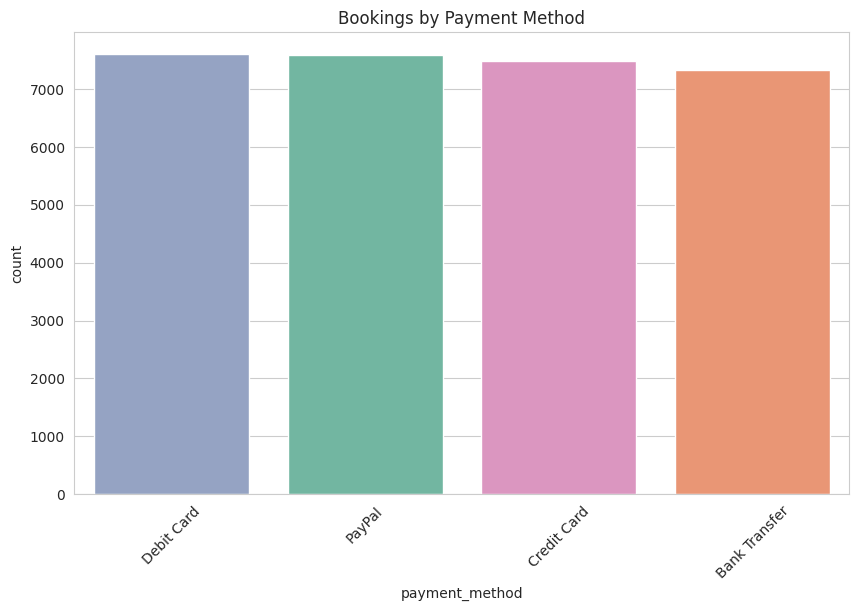

In [27]:
#Payment Method Analysis- Compared payment methods used by Customers
sns.countplot(x="payment_method", data=df, order=df['payment_method'].value_counts().index,
              hue="payment_method", legend=False, palette="Set2")
plt.title("Bookings by Payment Method")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1023835328.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="Blues_d")


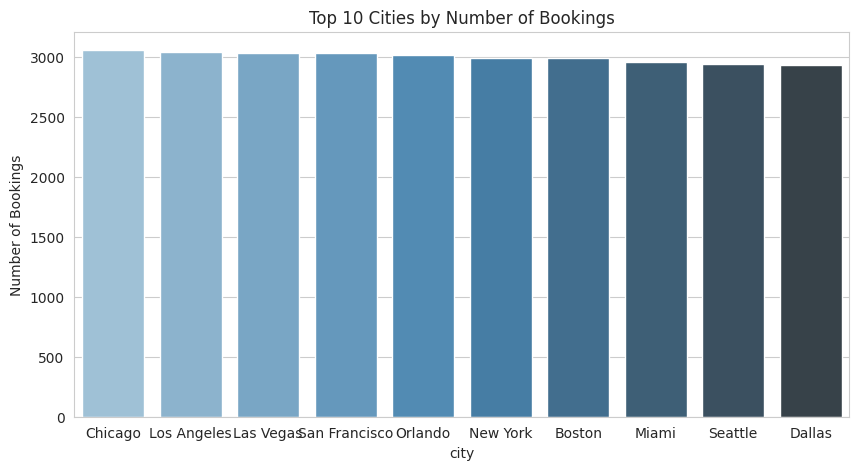

In [26]:
#Top Cities by Bookings
top_cities = df['city'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="Blues_d")
plt.title("Top 10 Cities by Number of Bookings")
plt.ylabel("Number of Bookings")
plt.show()

/tmp/ipython-input-1521952113.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="booking_channel", y="is_cancelled", data=cancel_df,


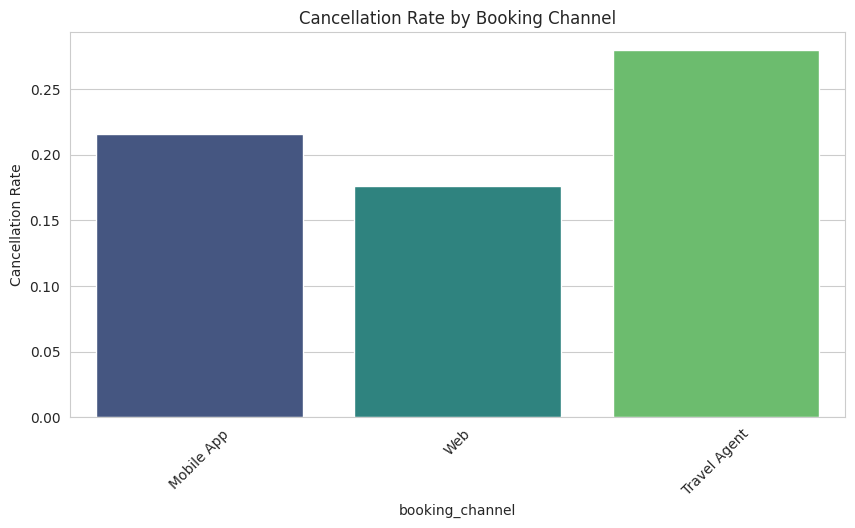

In [25]:
# Channel Performance vs Cancellation- Which channel got highest cancellation is analyzed in this graph and we got suprisingly an unwanted result booking made through travel agent having cancellation rate or 0.25
plt.figure(figsize=(10,5))
sns.barplot(x="booking_channel", y="is_cancelled", data=cancel_df,
            estimator=lambda x: sum(x)/len(x), errorbar=None, palette="viridis")
plt.title("Cancellation Rate by Booking Channel")
plt.ylabel("Cancellation Rate")
plt.xticks(rotation=45)
plt.show()



📌 ROOT CAUSE ANALYSIS:
1. High cancellation rates observed in specific channels and refundable/COD bookings.
2. Premium rooms and higher-star hotels drive revenue but face price-sensitive cancellations.
3. Seasonality strongly impacts demand — peak months show higher booking volumes and longer stays.
4. Longer lead times correlate with higher cancellation probability (guests book early, then change plans).


💡 BUSINESS RECOMMENDATIONS:
1. Reduce cancellations: Restrict COD, incentivize prepaid, and provide flexible rescheduling instead of full refund.
2. Improve profitability: Target repeat customers with loyalty discounts, upsell premium rooms, and focus on reliable channels.
3. Optimize pricing: Implement dynamic pricing in peak seasons, reduce discounts on high-cancellation channels, and offer bundled deals for longer stays.

# **Summary/Conclusion**


## 1️⃣ **Key Patterns & Trends**

### 1. Where Customers Book:

* Most bookings come through online travel portals, followed by direct bookings on the hotel website.

* Some channels consistently show fewer cancellations, meaning they are more reliable.

### 2. Room Types & Hotel Categories:

* Premium rooms in 4–5 star hotels are highly popular and generate more revenue.

* Budget rooms in 2–3 star hotels are more common, but customers here tend to cancel more frequently.

* Single-night and short stays are common, but longer stays happen mostly in higher-star hotels during peak seasons.

### 3. Cancellations & Lead Time:

* Higher cancellations are seen in budget hotels, refundable bookings, and COD payments.

* Guests who book well in advance are more likely to cancel later if their plans change.

* Peak months (holidays or vacation seasons) have high booking volumes but slightly lower cancellation rates.

### 4. Seasonal & Temporal Trends:

* Bookings peak during popular vacation months, showing clear seasonal demand.

* Average booking value is higher during peak months, especially in premium hotels.

##  2️⃣ **Root Cause Analysis**

From these patterns, we can understand why some things happen:

### 1. Cancellation Behavior:

* People booking through flexible channels or with refundable options cancel more often.

* Budget-conscious guests are sensitive to prices, leading to higher cancellations in lower-star hotels.

### 2. Channel & Hotel Performance:

* Premium hotels and direct bookings perform better because they attract serious travelers and have stricter booking policies.

* Certain channels may drive volume but also have higher cancellations due to easy refund policies.

### 3. Seasonal Effects:

* High demand during holidays boosts bookings and reduces cancellations slightly, while off-season months show lower bookings and higher cancellations.

* Longer stays are more common in peak periods, whereas short stays dominate the off-season.

## 3️⃣ **Business Recommendations**

Based on the analysis, here’s what the hotel business can do:

### 1. Reduce Cancellations:

* Encourage prepaid bookings instead of COD.

* Provide flexible rescheduling instead of full refunds to retain revenue.

* Focus on marketing through channels with historically lower cancellations.

### 2.Improve Profitability & Customer Loyalty:

* Upsell premium rooms during peak seasons.

* Offer loyalty discounts or packages for repeat guests.

* Bundle services like meals, transport, or activities to increase overall booking value.

### 3.Optimize Pricing & Promotions:

* Implement dynamic pricing based on season and demand.

* Reduce excessive discounts on high-cancellation channels.

* Offer targeted promotions for off-season months to maintain occupancy.

##4️⃣ **Conclusion**

In simple words, the hotel business can grow smarter by understanding its customers’ behavior:

* Focus on reliable channels and premium guests for stable revenue.

* Manage cancellations with prepaid and flexible rescheduling policies.

* Use seasonal insights to price rooms better, attract longer stays, and increase profitability.

* By following these strategies, the hotel can reduce losses, improve customer satisfaction, and boost revenue, all while keeping operations simple and efficient.